#### 讀取需要的函式庫

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import clear_output
from wordcloud import WordCloud
from PIL import Image
from func import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import jieba
import sys
import re
import os
# re -> \d for number, \s for any space (\t\r\n...) 

#### 讀取資料夾中的資料

In [2]:
#path = '../../107-1PythonSampleCode/week_5/task_5/*.txt'
path = './first/*.txt'
title, data = readdir(path)


Number of files : 10


#### 顯示部份資料內容

In [3]:
for i in range(len(data)):
    print('----Document : {0}----'.format(title[i]))
    print(data[i][:10], '...', data[i][-10:-1], sep='\n', end='\n\n')

----Document : first01----
﻿1.鴻夏戀 郭台銘
...
今尚難定論。


----Document : first02----
﻿2.	
郭台銘進
...
，顯得顛簸。


----Document : first03----
﻿3.	親會夏普高層
...
召開記者會。


----Document : first04----
﻿4.	傳鴻海擬吃夏
...
「明智」的決定。

----Document : first05----
﻿5.	郭董為何苦追
...
市場 重要度：低

----Document : first06----
﻿6.	夏普社長示愛
...
界矚目焦點！


----Document : first07----
﻿7.	INCJ嗆鴻
...
的團結愛國之心。

----Document : first08----
﻿8.	「鴻夏戀」破
...
AVX締結合約。

----Document : first09----
﻿9.	夏普收購案背
...
組的標誌性案例。

----Document : first10----
﻿10.	夏普證實鴻
...
狂飆16.8%。



#### 新增詞彙至自定義詞庫，並匯入該詞庫
* savetofile(path, list_like_data)
* example for list_like_data:
  * [['來台']] : 完整 '來台' 字串被存入字典中
  * ['來台'] :　'來台' 視為獨立字元，存入 '來' '台' 於字典中 

In [4]:
savetofile('./dict.txt', [['來台']])  # 完整字串　'來台'　被存入字典中
jieba.load_userdict('./dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.074 seconds.
Prefix dict has been built succesfully.


#### 新增詞彙至自定義停止詞彙中

In [5]:
stopwords = ['一','二','三','四','五','六','用','淨','利','值','前','據','談','自','至','曾','出',
            '合','最','供','而','個','很','得','達','家','進','所','夏','若','邱','但','中','可',
            '他','我','列','將','對','之','率','已','由','佔','本','日','月','年','另','故','於',
            '較','請','再','經','也','在','依','到','等','或','大','認列','不僅','讓','相關','最終',
            '把','沒','及','過去','認為','為','按','比','仍','係','後','及與','以','時','該','的',
            '並','更','就','註','有','事','來','不','從','堺','權','從','卻','說','要','今','度',
            '手','才','又','其','長','了','百','億','元','例如','可能','由於','因此','土城','一份',
            '上午','這份','多','赴','和','與','是','約','就是','只是','但是','如果','附註','部分',
            '事項','各位','品牌','集團','幅度','資產','新','台幣','日圓','億日圓','機構','面板','日元',
            '企業','報導','媒體','目前','提案','經營','實地','大阪','億元','以及','代工','一步','第二',
            '雙方','方案','分析','接受','成為','事業','目前','高橋','董事','營業','受到','提供','使用',
            '本年','說明','現金','成本','營業外','收入','結轉','分攤','其他','影響財務','詳合','結果',
            '不是','是否','最高','記者','超過','兩家','主幹','我們','除了','自己','立刻','','日本',
            '之間','不過','今天','然而','此外','工廠','預測','如下','之一','附註','附','註','其中',
            '因為','查核','報告增加','會計','相對','仟元','金額','權益','能力利益','股東','合理性',
            '假設','無形','上','開關鍵','模型','支出','控制','計算','資金評估','報告','因應','仟元',
            '金額','權益','假設','無形','上','模型','支出','控制','計算資金','評估','人次','重大',
            '資訊','總額','民國','估計','一副','公司','年度','包括','正確性','正','確性','減損','共為',
            '預估','預算','去年同期','應該','雖然','下午','要求','一樣','一家','維持','公開','整體',
            '表示','特性','市場','科目','發生','年本','重要','判斷','主要','流量','意見','關鍵','同期',
            '評價','正確','地區','總資產','執行','程序','測試','稅後淨利','股份有限公司','蘋果','鴻海',
            '夏普','郭台銘','鴻夏戀','iPhone','1','2','3','4','5','6','7','8','9','0','NT','2012',
            '10','三星','供應商','INCJ','案','LG','會','下','買','電子','清單','向','都','郭董',
            '能力','進','廠','內','購','併','這','看','人','被','能','外界','指出','五日','不同','陷入',
            '出現','一年','什麼','安倍','這個','可以','一個','同時','去年','部門','二月','這是','月底',
            '完成','財務','今年','階段','子公司','條件','引述','召開','擁有','有助','持有','進入','旗下',
            '已經','入座','罩','業務','顯示','尺寸','萬張','取得','高達','持續','進行','人士','提出',
            '社長','加工','內容','總部','沒有','加上','決定','群創','最大','四年','代廠','做','鴻','高',
            '市','不會','傳出','文件','客戶超過','SDP','JDI','IGZO','Display','WitsView','NHK',
            '12','7000','3500','2015','2016','25','30','000','29']
puncs_Full = '！？｡＂＃＄％＆＇（）()＊＋，－／：；＜＝＞＠［＼］$＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;<=>@[]^_{}|~\\\""
savetofile('./stopword.txt', [stopwords, puncs_Full, puncs_Half])

In [6]:
stopword = readdir('./stopword.txt')[1][0].split('\n')
stopword.append('\n')
stopword[0:10]


Number of files : 1


['一', '二', '三', '四', '五', '六', '用', '淨', '利', '值']

#### 利用 jieba 對文件進行斷字，並統計字詞頻率，顯示前十名資料

In [7]:
wordDictionary = []
for i in range(len(data)):
    seg_list = jieba.cut(data[i], cut_all=False)
    seg_list = list(seg_list)
    wordDict = {}
    for w in seg_list:
        if (w not in stopword) and (w not in puncs_Full) and (w not in puncs_Half):
            if w in wordDict:
                wordDict[w] = wordDict[w] + 1
            else:
                wordDict[w] = 1
    wordDictionary.append(wordDict)
    print('Number of word in document ({0}) : '.format(title[i]), len(wordDict))
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    print(sort[0:10])
    data[i] = ','.join(jieba.cut(data[i], cut_all=False))

Number of word in document (first01) :  446
[('\r\n', 56), ('台灣', 7), ('產業', 7), ('重整', 7), ('談判', 6), ('革新', 6), ('協議', 6), ('銀行', 6), ('〈', 5), ('經營者', 4)]
Number of word in document (first02) :  518
[('\r\n', 71), ('技術', 16), ('希望', 6), ('談判', 6), ('優先', 6), ('掌握', 5), ('收購', 5), ('產品', 5), ('台灣', 5), ('零件', 5)]
Number of word in document (first03) :  320
[('\r\n', 74), ('合作', 9), ('投資', 4), ('股權', 4), ('規劃', 4), ('時間', 4), ('未來', 4), ('國外', 3), ('巿', 3), ('液晶', 3)]
Number of word in document (first04) :  168
[('\r\n', 14), ('昨日', 4), ('收購', 4), ('股權', 4), ('希望', 3), ('外傳', 3), ('銀行', 3), ('高橋興', 2), ('此', 2), ('郭', 2)]
Number of word in document (first05) :  459
[('\r\n', 96), ('技術', 15), ('全球', 10), ('訂單', 9), ('○', 8), ('效益', 8), ('碩', 5), ('未來', 5), ('產品', 5), ('估算', 4)]
Number of word in document (first06) :  190
[('\r\n', 19), ('股東會', 6), ('合作', 4), ('找', 3), ('十代', 3), ('援助', 3), ('成功', 3), ('最佳', 2), ('獲利', 2), ('拒絕', 2)]
Number of word in document (first07) :  152
[('\r\n',

#### 顯示各文件低於閥值 (limit) 的字詞

In [8]:
limit = 0
wordsperdocument = 50
for i in range(len(data)):
    count = 0
    print('----Document : {0}----'.format(title[i]))
    for ind, value in wordDictionary[0].items():
        if (value <= limit) & (count != wordsperdocument):
            count += 1
            print(ind, end = ', ')
    print()

----Document : first01----

----Document : first02----

----Document : first03----

----Document : first04----

----Document : first05----

----Document : first06----

----Document : first07----

----Document : first08----

----Document : first09----

----Document : first10----



#### 利用 wordDictionary 移除出現次數低於閥值 (limit) 的字詞，並顯示部份結果

In [9]:
for i in range(len(data)):
    for key, value in wordDictionary[0].items():
        if value <= limit:
            data[i] = data[i].replace(key, '')
    print('document :', title[i])
    print(data[i][:50], '...', data[i][-50:-1], sep='', end='\n\n')

document : first01
﻿,1,.,鴻夏戀, ,郭台銘,沒學,的,「,大阪,談判術,」,
,鴻夏戀,談,了,四年,，,過程...,為,目標,。,只是,鴻海,和,夏普,的,合作,談判,很,脆弱,，,至今,尚難,定論,。,
,

document : first02
﻿,2,.,	,
,郭台銘,進擊,碰壁,：,鴻夏戀,仍,原地踏步,？,
,峰,迴,路轉,，,撲,...有,來,到,郭台銘,手上,？,邁向鴻夏,「,結婚,」,的,最後一哩路,，,顯得,顛簸,。,
,

document : first03
﻿,3,.,	,親會,夏,普高,層, ,郭台銘,：,完成,九成, ,盼,29,日,簽約,
,鴻海,...。,據,報導,，,郭董,表示,，,將在,2,月,29,日,就,夏普,案召開,記者,會,。,
,

document : first04
﻿,4,.,	,傳,鴻海,擬吃,夏普,2,／,3,股權,
,鴻海,搶親,夏普,（,Sharp,）,...在,仔細,比,較,鴻海,和,INCJ,提案,後,，,可以,做出,最,「,明智,」,的,決定,。,

document : first05
﻿,5,.,	,郭董,為,何苦,追錢,坑,夏普,？,
,鴻海,集團,董事,長,郭台銘,在,外商,採...鴻海,有,科技,技術,與,量產,能力,，,可結合,搶攻,智慧,家庭,市場, ,重要,度,：,低,

document : first06
﻿,6,.,	,夏普,社長,示愛, ,重燃鴻夏戀,
,夏普,才剛,接受,堺,市,十代,廠,SDP,...像,空間,，,看來鴻夏戀,成不成,，,明天,鴻海,股東會,，,將成,外界,矚目,焦點,！,
,

document : first07
﻿,7,.,	,INCJ,嗆,鴻海,是,要,吃掉,夏普,
,日本,產業,革新,機構,（,Ｉ,Ｎ,Ｃ...銘,就算,今天,想當,一回,稻盛和夫,，,恐怕,也,敵不過,日本,人,的,團結,愛國,之心,。,

document : first08
﻿,8,.,	,「,鴻夏戀,」,破局, ,敗給,團結,的,日本,
,鴻海,併,夏普,的,「,鴻夏戀...此,，,力排,眾議,，,以,高出,原股價,一倍,多,的,72,美元,與,AVX,締結合,約,。,

document : first09
﻿,9,.,	,夏普,收購案,背,後

#### 移除所有標點符號、非中文英文數字之資料

In [10]:
for i in range(len(data)):
    data[i] = re.sub('[^\u4e00-\u9fff,]', '', data[i])
#[^\u4e00-\u9fff A-Za-z0-9]

#### 印出部份斷字結果

In [11]:
for i in range(len(data)):
    print('document :', title[i])
    print(data[i][:20], ' ... ', data[i][-20:-1], sep='', end='\n\n')

document : first01
,,,鴻夏戀,,郭台銘,沒學,的,,大阪 ... 談判,很,脆弱,,至今,尚難,定論,,

document : first02
,,,,,郭台銘,進擊,碰壁,,鴻夏戀, ... 婚,,的,最後一哩路,,顯得,顛簸,,

document : first03
,,,,親會,夏,普高,層,,郭台銘,, ... ,,日,就,夏普,案召開,記者,會,,

document : first04
,,,,傳,鴻海,擬吃,夏普,,,,股權 ... ,可以,做出,最,,明智,,的,決定,

document : first05
,,,,郭董,為,何苦,追錢,坑,夏普, ... 攻,智慧,家庭,市場,,重要,度,,低

document : first06
,,,,夏普,社長,示愛,,重燃鴻夏戀, ... ,股東會,,將成,外界,矚目,焦點,,

document : first07
,,,,,嗆,鴻海,是,要,吃掉,夏普, ... 不過,日本,人,的,團結,愛國,之心,

document : first08
,,,,,鴻夏戀,,破局,,敗給,團結, ... 倍,多,的,,美元,與,,締結合,約,

document : first09
,,,,夏普,收購案,背,後,的,光和影 ... ,電子業界,重組,的,標誌,性,案例,

document : first10
,,,,夏普,證實,鴻海,具優勢,,郭董 ... 新高,水準,,夏普,,日收盤,狂飆,,



#### 初始化 TFIDF 物件，用以計算 tfidf

In [12]:
tfidf_vectorizer = TfidfVectorizer(max_df = 1, min_df = 0, analyzer = 'word'
                                   , stop_words = stopword, max_features = 10000)
#tfidf_vectorizer = CountVectorizer(stop_words = stopword)

#### 顯示初始化時輸入的停止詞彙 

In [13]:
print(tfidf_vectorizer.get_stop_words())

frozenset({'', '中', '中將', '三方', '中信', '之平', '以彌補', '下述', '以內', '雖然', '％', '一套', '關鍵', '手', '報表', '#', '三成', '任越', '內容', '一副', '並宣導', '主要', '5', '以及', '上不斷', '一遭', '“', '一月', '並確', '資金評估', '深陷', '之溢', '人持', '時', '總資產', '局面', '性事', '執行', '查核', '：', '供應將', '並在', 'WitsView', '不要', '事部', '由', '合理性', '之驗', '能力利益', '並認', '購', '陷入', '之場', '淨', '、', '供應商', '本會', '傳輸系', '模型', '召開', '假設', '不少', '（', '大', '正確', '面板', '佔率', '並稱', '附', '開關鍵', '月', '之間', '分析', '報告', '以便', '最', '以人', '之後淨', '大阪', '表示', '一四會計', '一旦', '(', '｛', '郭董', '二家', '預估', '之約', '但', '等', '黑衣', '進', '出現', '過去', '並於', '〟', '‧', '三箭', '以順利', '引述', '人本', '無形', '；', '一九', '做', '立刻', '並引進', '並預計', '｠', '能', '以來', '一般', '=', '百', '伍拾', '以不', '五', '~', '一有', '故', '之庫', '該', '但是', '一方', '中劃', '中逆勢', '夏', '0', '擁有', '之不', '五權', '人運', '機構', '其', '$', '以', '董事', '9', '一億', '值之', '及與', '不及', '’', '日圓', '.', '修改', 'JDI', '上個', '上台', '方案', '一份', '以進', 'INCJ', ',', '一早', '結果', '文件', '三線', '並不', '不利素', '不二', '增加', '億', '他們', '認列', '並與', '成為', '〘'

#### 計算 TFIDF 詞頻矩陣

In [14]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

/home/dongdong/.local/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['display', 'igzo', 'incj', 'iphone', 'jdi', 'lg', 'nhk', 'nt', 'sdp', 'witsview'] not in stop_words.
  sorted(inconsistent))


#### 顯示 TFIDF 詞頻矩陣大小

In [15]:
tfidf_matrix.shape

(10, 1621)

#### 顯示部份 TFIDF 詞頻矩陣中的字詞

In [16]:
words = tfidf_vectorizer.get_feature_names()
print(words[0:50])

['上半年', '上層察覺', '上市', '上海', '上漲', '下半年', '下台', '下滑', '下跌', '不單', '中國大陸', '中央社', '中階', '主力', '主導性', '主張', '主管', '主義經濟', '主角', '久而久之', '之中', '之後股價', '之時', '九億元', '九十', '予人景氣', '事情', '事業營', '事業部', '事要', '二二', '二是', '五十二', '五十元', '五千', '五年', '五成', '五美元', '五點', '亞洲', '交代', '交易', '交易所', '交流', '交給', '亮眼', '人並', '人員', '人均', '人才']


#### 顯示 TFIDF > 閥值 (limit) 的資料

In [17]:
limit = 0.1
wordsperdocument = 10
for i in range(len(data)):
    count = 0
    print('----Document : {0}----'.format(title[i]))
    for j in range(len(words)):
        if (tfidf_matrix[i,j] > limit) and (count != wordsperdocument):
            print(words[j], tfidf_matrix[i,j])
            count += 1

----Document : first01----
作法 0.1078327732034382
做成 0.1078327732034382
內厚 0.1078327732034382
出資約 0.1078327732034382
協助 0.1078327732034382
原本 0.1078327732034382
商品 0.1078327732034382
四日 0.1078327732034382
地方 0.1078327732034382
培育 0.1078327732034382
----Document : first02----
低成本 0.11377602479771472
單純 0.11377602479771472
回到 0.17066403719657208
層次 0.11377602479771472
形容 0.17066403719657208
影舞者 0.11377602479771472
為何 0.11377602479771472
的關 0.11377602479771472
看花 0.11377602479771472
紀錄片 0.17066403719657208
----Document : first03----
中央社 0.14396315014973896
交易 0.14396315014973896
前往 0.21594472522460842
創新 0.14396315014973896
將在 0.14396315014973896
拜會 0.14396315014973896
支援 0.21594472522460842
日媒 0.14396315014973896
規劃 0.2879263002994779
輕人 0.14396315014973896
----Document : first04----
下台 0.18898223650461363
增資 0.18898223650461363
外傳 0.2834733547569204
據悉 0.18898223650461363
昨日 0.37796447300922725
最新版 0.18898223650461363
----Document : first05----
估算 0.18569533817705125
供應 0.139271503632788

#### 顯示文件相似性矩陣

In [18]:
dist = cosine_similarity(tfidf_matrix)
print(dist)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


#### 初始化 Count_vectorizer 物件，用以計算字頻

In [19]:
count_vectorizer = CountVectorizer(max_df = 1, min_df = 0, analyzer = 'word', stop_words = stopword)

#### 計算詞頻矩陣

In [20]:
count_matrix = count_vectorizer.fit_transform(data)

/home/dongdong/.local/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['display', 'igzo', 'incj', 'iphone', 'jdi', 'lg', 'nhk', 'nt', 'sdp', 'witsview'] not in stop_words.
  sorted(inconsistent))


#### 顯示詞頻矩陣大小 (理論上與 TFIDF 詞頻矩陣相同)

In [21]:
count_matrix.shape

(10, 1621)

In [22]:
count_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
countframe = pd.DataFrame(count_matrix.toarray().T, index = count_vectorizer.get_feature_names(), columns = title)
countframe.head(10)

,first01,first02,first03,first04,first05,first06,first07,first08,first09,first10
上半年,0,1,0,0,0,0,0,0,0,0
上層察覺,0,0,0,0,0,0,0,0,1,0
上市,0,0,0,0,0,0,1,0,0,0
上海,1,0,0,0,0,0,0,0,0,0
上漲,0,0,0,0,0,0,0,1,0,0
下半年,0,0,0,0,0,1,0,0,0,0
下台,0,0,0,2,0,0,0,0,0,0
下滑,0,0,0,0,0,0,0,0,0,1
下跌,0,0,1,0,0,0,0,0,0,0
不單,0,0,0,1,0,0,0,0,0,0


#### 初始化 WordCloud 物件

In [24]:
font = r"/home/dongdong/.local/share/fonts/msjh.ttf"
mask = np.array(Image.open("./cloud.png"))
wordcloud = WordCloud(font_path=font, background_color = 'white', mask = mask)

#### 顯示整體詞庫的字詞頻率及前十名

(array([ 0.,  2.,  4.,  6.,  8., 10.]), <a list of 6 Text yticklabel objects>)

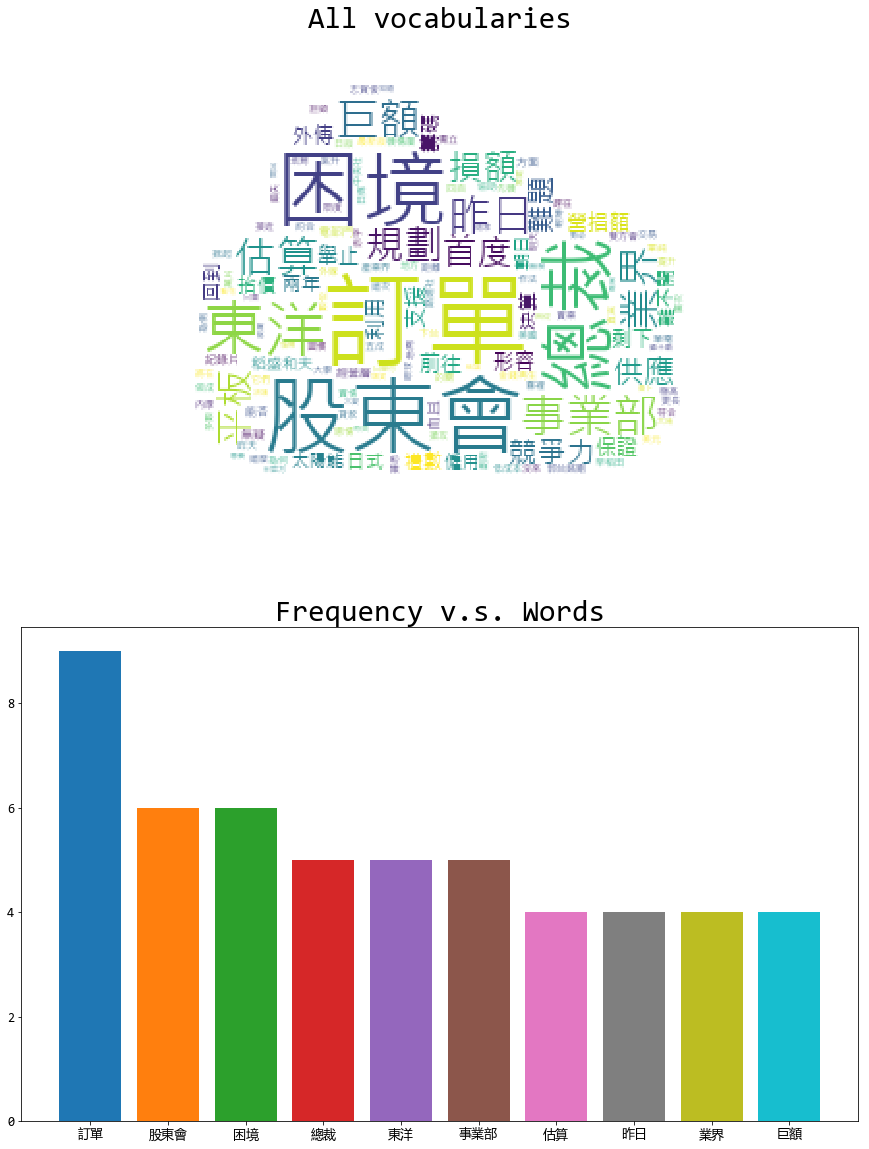

In [25]:
wordDict_key = count_vectorizer.get_feature_names()

wordDict = dict()
for i in range(len(wordDict_key)):
    wordDict_value = 0
    for j in range(len(data)):
        wordDict_value += count_matrix.toarray()[j].tolist()[i]
    wordDict[wordDict_key[i]] = wordDict_value

f = plt.figure(figsize=(15,20))
f.subplots_adjust(wspace = 0)

f.add_subplot(2, 1, 1)
wordcloud.fit_words(wordDict)
plt.title('All vocabularies', fontsize = 30)
plt.axis("off")
plt.imshow(wordcloud)

f.add_subplot(2, 1, 2)
sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
for i in range(10):
    plt.bar(sort[i][0], sort[i][1])
plt.title('Frequency v.s. Words', fontsize = 30)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

#### 顯示各個文件的字詞頻率及前十名

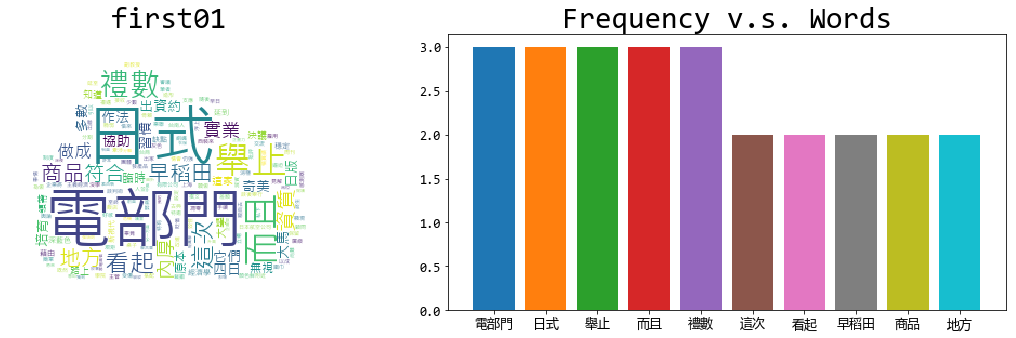

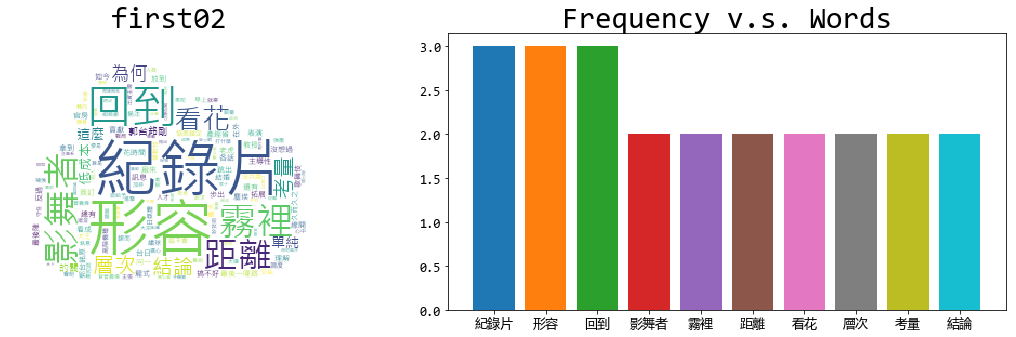

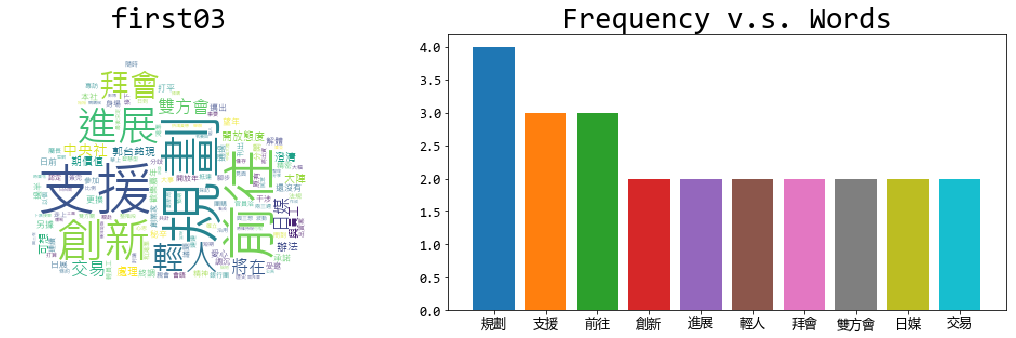

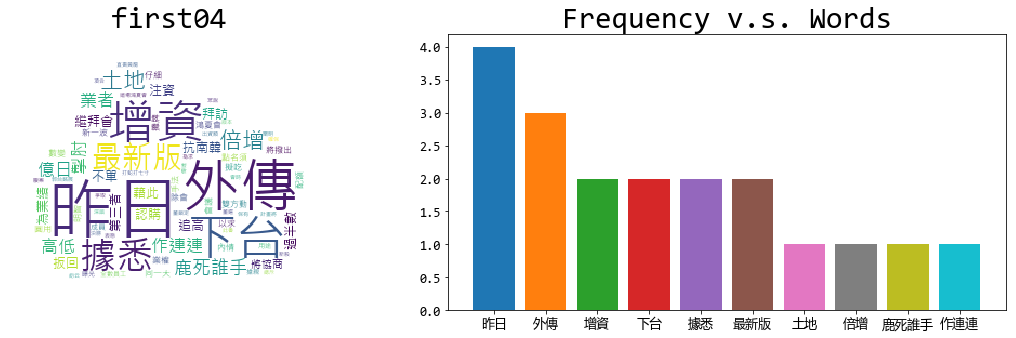

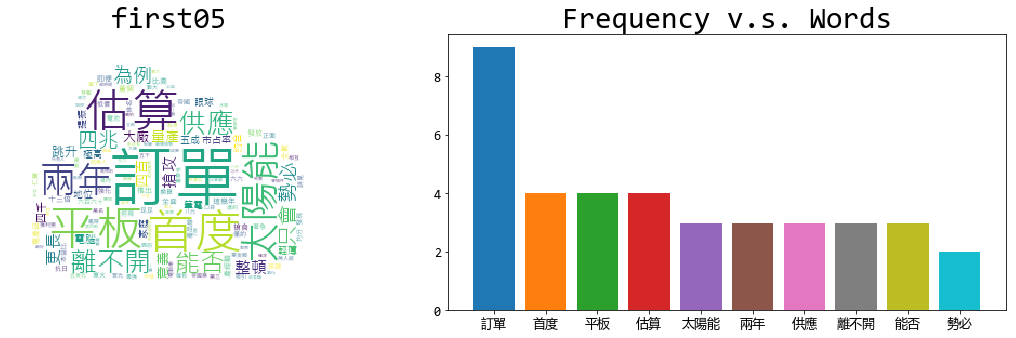

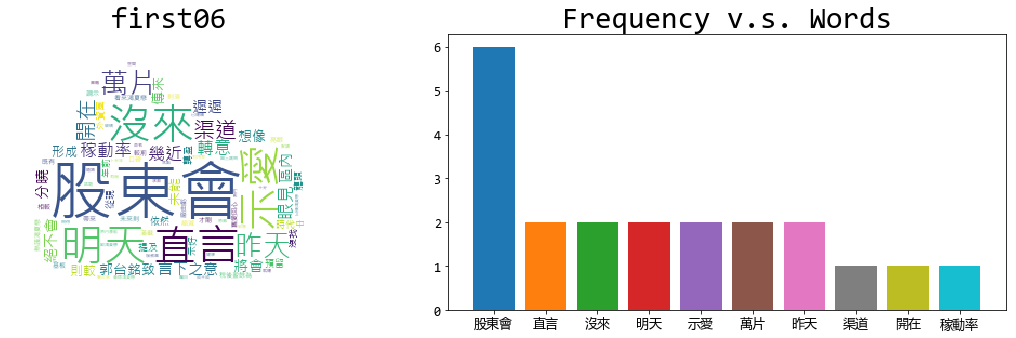

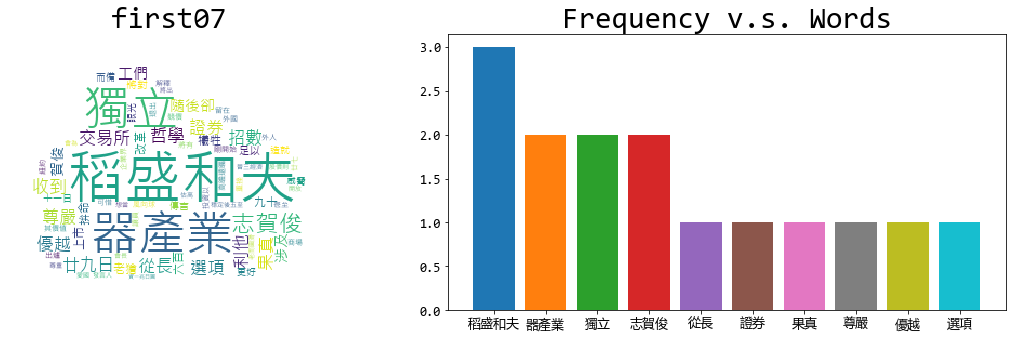

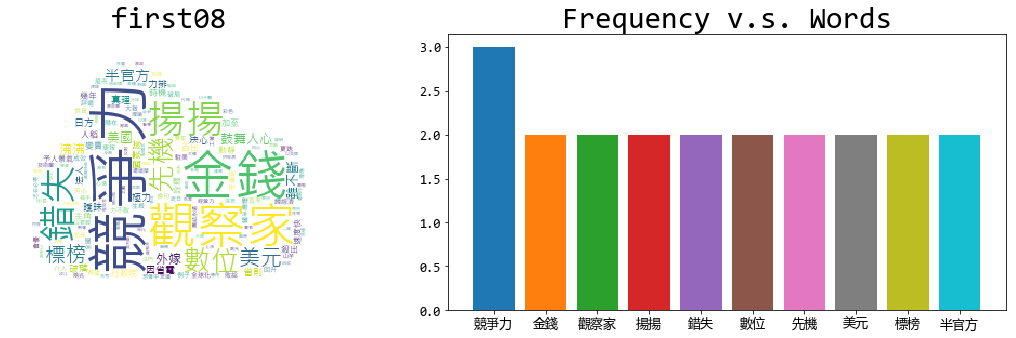

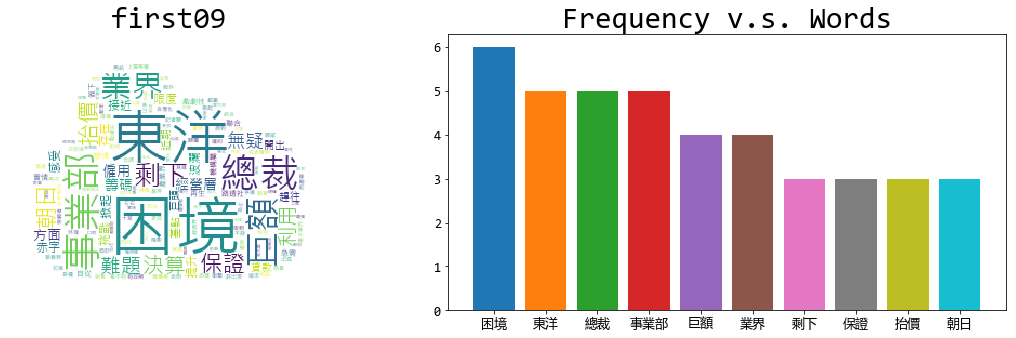

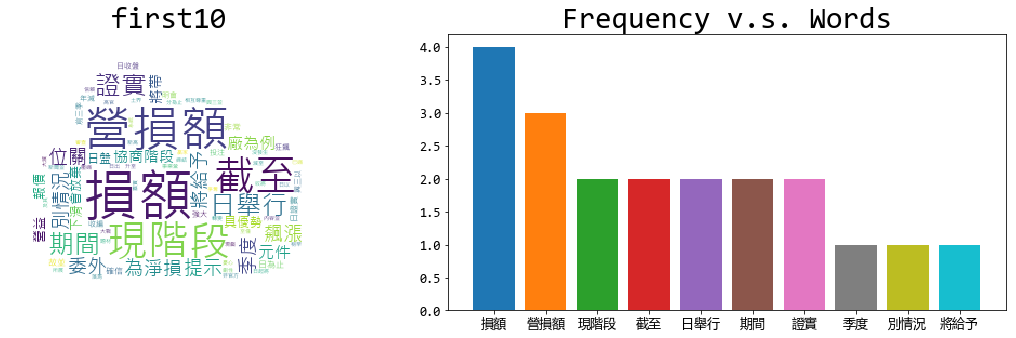

In [26]:
wordDict_key = count_vectorizer.get_feature_names()
plotind = 1
for i in range(len(data)):
    wordDict_value = count_matrix.toarray()[i].tolist()
    wordDict = dict()
    
    for j in range(len(wordDict_key)):
        if wordDict_value[j] != 0:
            wordDict[wordDict_key[j]] = wordDict_value[j]
            
    f = plt.figure(figsize=(20,6*len(data)))
    f.subplots_adjust(wspace = 0)

    f.add_subplot(len(data), 2, plotind)
    plotind += 1
    wordcloud.fit_words(wordDict)
    plt.title('{0}'.format(title[i]), fontsize = 30)
    plt.axis("off")
    plt.imshow(wordcloud)

    f.add_subplot(len(data), 2, plotind)
    plotind += 1
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    for i in range(10 if (len(sort)>10) else len(sort)):
        plt.bar(sort[i][0], sort[i][1])
    plt.title('Frequency v.s. Words', fontsize = 30)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)

#### 定義 addstopword 及 adddict 函式

In [27]:
def addstopword(data):
    stop = []
    if os.path.isfile('./stay.txt'):
        with open('./stay.txt', 'rb') as f:
                text = f.read()
                encode = chardet.detect(text)
        stay = list(map(str.strip, open('./stay.txt', 'r+', encoding=encode['encoding']).readlines()))
    else:
        stay = []
    length = len(data)
    index = 0
    value = ''
    tmp = ''
    while(index != length):
        clear_output()
        if data[index] not in stay:
            print(data[index])
            value = input('Add to stop word [y:stopword/n:stayword/q:quit]: ')
            if value == 'y':
                if tmp == 'p': stay.remove(data[index])
                stop.append(data[index])
            elif value == 'n':
                if tmp == 'p': stop.remove(data[index])
                stay.append(data[index])
            elif value == 'p':
                index -= 2
            elif value == 'q':
                break
        tmp = value
        index += 1
    return stop, stay


def addword():
    word = []
    while(True):
        # clear_output()
        value = input('Add to dictionay word [q:quit]: ')
        if value == 'q':
            break
        else:
            word.append(value)
    return word

In [28]:
.

SyntaxError: invalid syntax (<ipython-input-28-a5d5b61aa8a6>, line 1)

#### 新增停止詞彙 (半自動)

In [ ]:
stop, stay = addstopword(tfidf_vectorizer.get_feature_names())
clear_output()
print(stop)
print('Save {0} words to stopword'.format(len(stop)))
savetofile('./stopword.txt', [stop])
print(stay)
print('Save {0} words to stayword'.format(len(stay)))
savetofile('./stay.txt', [stay])

#### 新增停止詞彙 (手動)

In [ ]:
stop = addword()
clear_output()
print(stop)
print('Save {0} words to stopword'.format(len(stop)))
savetofile('./stopword.txt', [stop])

#### 新增自定義字典詞彙 (手動)

In [ ]:
dictionary = addword()
clear_output()
print(dictionary)
print('Save {0} words to stopword'.format(len(dictionary)))
savetofile('./dict.txt', [dictionary])